(41, 2)
        title rating
0        그린 북   9.65
1        가버나움   9.59
2    보헤미안 랩소디   9.44
3         언더독   9.42
4  폴란드로 간 아이들   9.40


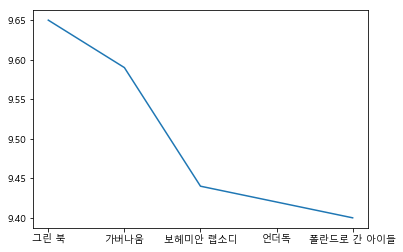

In [33]:
from bs4 import BeautifulSoup
import urllib.request
import urllib.parse

import pandas as pd

date = pd.date_range(start='20160122', end='20190221')

url = "https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20190221"
with urllib.request.urlopen(url) as response:
    html = response.read()
    soup = BeautifulSoup(html, 'html.parser')

titles = soup.find_all("div",{"class":"tit5"})
ratings = soup.find_all("td",{"class":"point"})

data = []
for i in range(len(titles)):
    data.append([titles[i].a.string, ratings[i].string])
    df = pd.DataFrame(data, columns =['title','rating'])
print(df.shape)
print(df.head())


import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

x = list(df['title'].head())
y = list(df['rating'].head().astype(float))
plt.plot(x,y)

